In [1]:
library(reticulate)
library(ktplots)
library(anndata)
library(Seurat)

Loading required package: ggplot2

Attaching SeuratObject



In [2]:
### Convert h5ad to seurat rds
h5ad_file <- "./CTCL/cellphoneDB_revision/CTCL_sub_nomore_100_per_donor_celltype_anno.h5ad"
sdata <- read_h5ad(h5ad_file)
sdata <- CreateSeuratObject(counts = t(as.matrix(sdata$X)), meta.data = sdata$obs)

In [3]:
saveRDS(sdata, file = "./CTCL/cellphoneDB_revision/CTCL_sub_nomore_100_per_donor_celltype_anno.rds")

In [3]:
seurat_object <- readRDS("./CTCL/cellphoneDB_revision/CTCL_sub_nomore_100_per_donor_celltype_anno.rds")

In [4]:
#### cellphoneDB output
pvals <- read.delim("./CTCL/cellphoneDB4_revision/statistical_analysis_pvalues.txt", check.names = FALSE)
means <- read.delim("./CTCL/cellphoneDB4_revision/statistical_analysis_means.txt", check.names = FALSE)
deconv <- read.delim("./CTCL/cellphoneDB4_revision/statistical_analysis_deconvoluted.txt", check.names = FALSE)

In [5]:
library(SingleCellExperiment)

ad=import('anndata')

adata = ad$read_h5ad(h5ad_file)
counts <- Matrix::t(adata$X)
row.names(counts) <- row.names(adata$var)
colnames(counts) <- row.names(adata$obs)
sce <- SingleCellExperiment(list(counts = counts), colData = adata$obs, rowData = adata$var)

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.ma

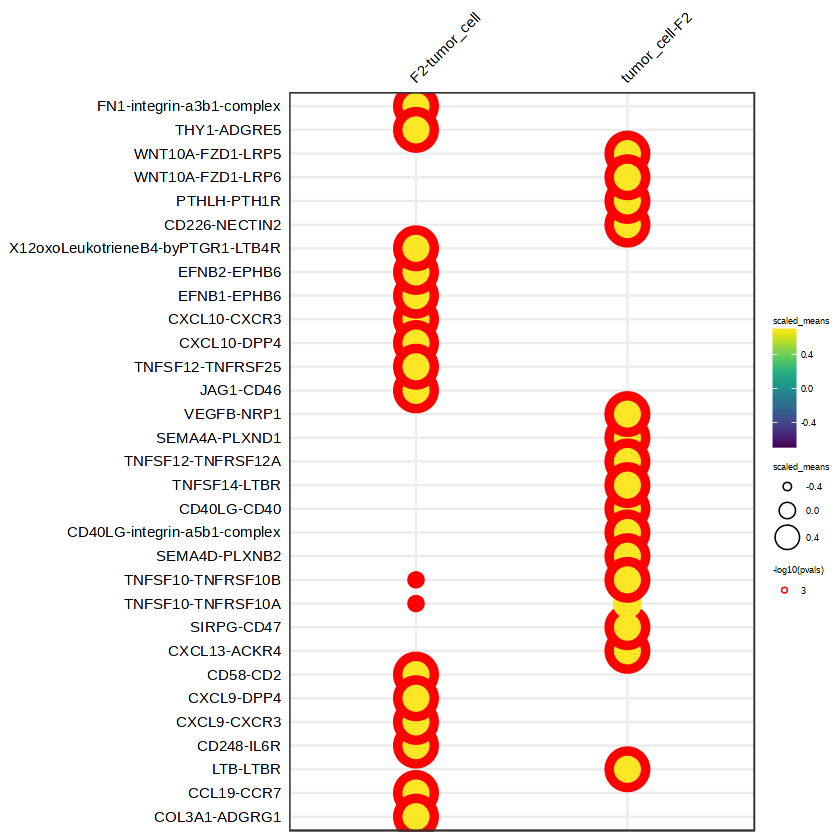

In [34]:
plot_cpdb(cell_type1 = 'F2', cell_type2 = 'tumor_cell', scdata = seurat_object,
          idents = 'cell_type', means = means, pvals = pvals,
          keep_significant_only=T, genes = rownames(ll)) + small_guide()  + small_legend(keysize=1)

Loading required namespace: ComplexHeatmap



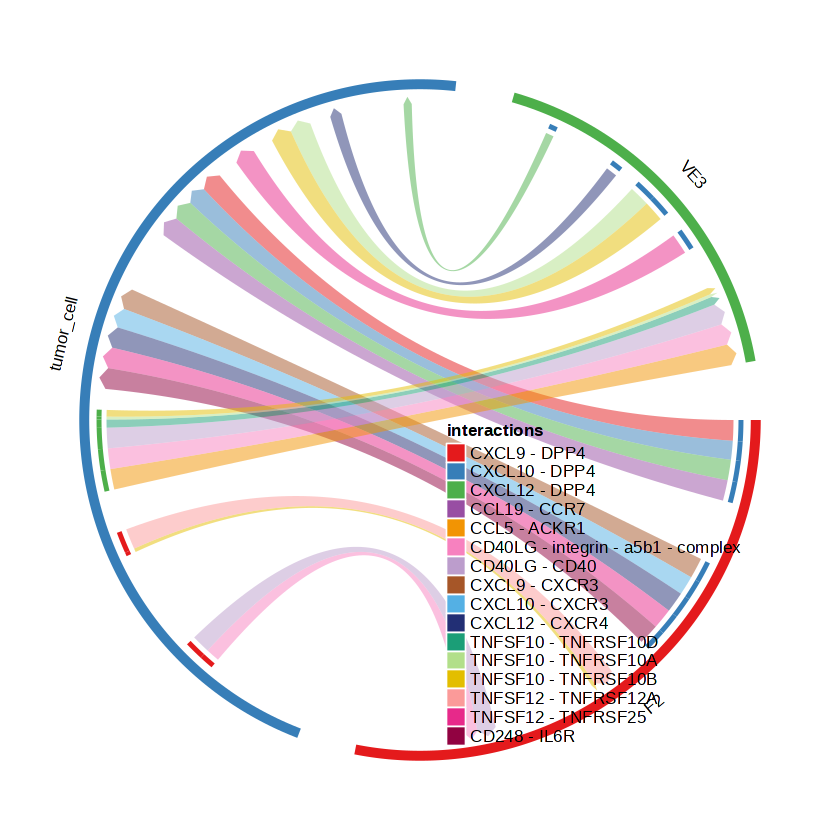

In [6]:
p <- plot_cpdb3(cell_type1 = 'tumor_cell', cell_type2 = 'F2|VE3',
                scdata = sce,
                idents = 'cell_type', # column name where the cell ids are located in the metadata
                means = means,
                pvals = pvals,
                deconvoluted = deconv, # new options from here on specific to plot_cpdb3
                keep_significant_only = TRUE,
                standard_scale = TRUE,
                remove_self = TRUE,
                genes = c('CCL5','CD74','CXCL9','HLA-DRB5','HLA-DPA1','HLA-DQA1','HLA-DRA','HLA-DRB1','CXCL10','CCL19','TNFSF12','TNFSF10','CD40','CXCL12','CD248')
)

In [32]:
pdf('figures/cpdb_F2_VE3_tumorcell.2.pdf', w=8, h=9)
p <- plot_cpdb3(cell_type1 = 'tumor_cell', cell_type2 = 'F2|VE3',
                scdata = sce,
                idents = 'cell_type', # column name where the cell ids are located in the metadata
                means = means,
                pvals = pvals,
                deconvoluted = deconv, # new options from here on specific to plot_cpdb3
                keep_significant_only = TRUE,
                standard_scale = TRUE,
                remove_self = TRUE,
                genes = c('CCL5','CD74','CXCL9','HLA-DRB5','HLA-DPA1','HLA-DQA1','HLA-DRA','HLA-DRB1','CXCL10','CCL19','TNFSF12','TNFSF10','CD40','CXCL12','CD248')
)
dev.off()

png 
  2

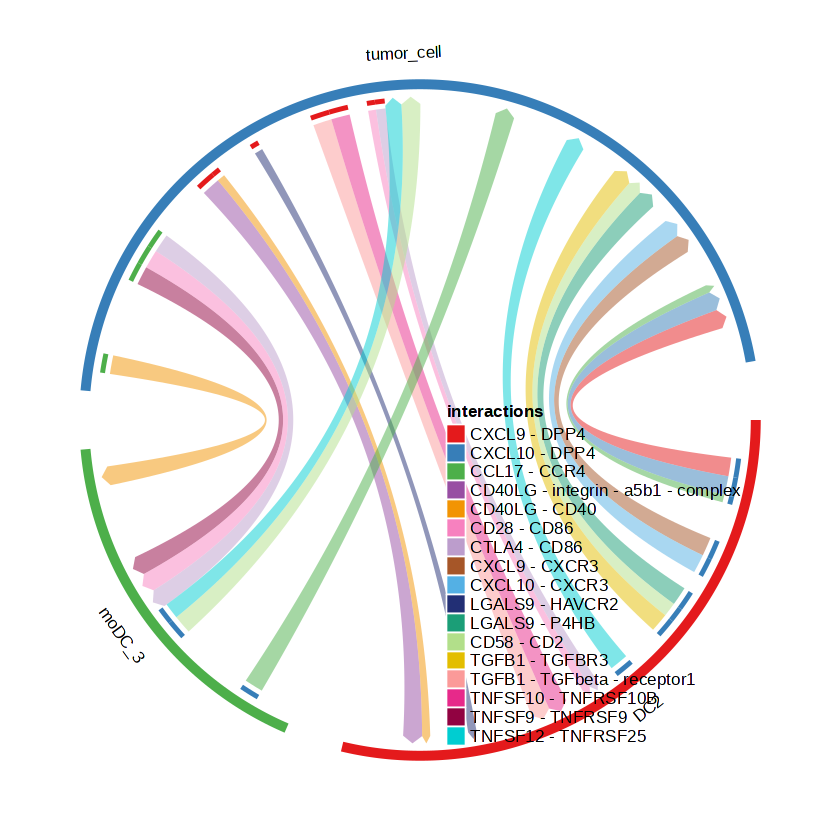

In [7]:
p <- plot_cpdb3(cell_type1 = 'tumor_cell', cell_type2 = 'DC2|moDC_3',
                scdata = sce,
                idents = 'cell_type', # column name where the cell ids are located in the metadata
                means = means,
                pvals = pvals,
                deconvoluted = deconv, # new options from here on specific to plot_cpdb3
                keep_significant_only = TRUE,
                standard_scale = TRUE,
                remove_self = TRUE,
                genes = c('CD86','CXCL9','CXCL10','LGALS9','CD40','TGFB1','TNFSF10','TNFSF12','CD58','CCL17','TNFSF9','CD55')
)

In [8]:
pdf('figures/cpdb_DC2_moDC3_tumorcell.pdf', w=8, h=9)
p <- plot_cpdb3(cell_type1 = 'tumor_cell', cell_type2 = 'DC2|moDC_3',
                scdata = sce,
                idents = 'cell_type', # column name where the cell ids are located in the metadata
                means = means,
                pvals = pvals,
                deconvoluted = deconv, # new options from here on specific to plot_cpdb3
                keep_significant_only = TRUE,
                standard_scale = TRUE,
                remove_self = TRUE,
                #genes = c('IFI35','PRKDC','TFAM','TSR3','EFHD2','HCLS1','UNC93B1',
                #          'STAT1','IL17RA','LGALS9','TGFB1','TNFSF10','CXCL9','CXCL10','TNFSF12','IL23A','IL18','TNF')
                genes = c('CD86','CXCL9','CXCL10','LGALS9','CD40','TGFB1','TNFSF10','TNFSF12','CD58','CCL17','TNFSF9','CD55')
)
dev.off()

png 
  2